In [1]:
# Codes for Dr. Cohen's course 

import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.fftpack
import random
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn-dark-palette")

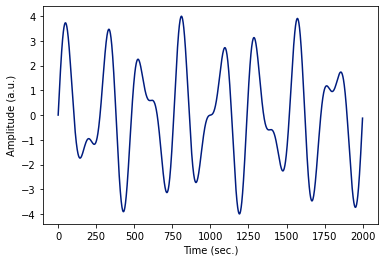

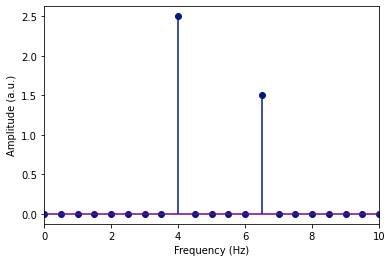

In [2]:
## q

# create the signal
srate  = 1000 # hz
time   = np.arange(0.,2.,1/srate) # time vector in seconds
pnts   = len(time) # number of time points
signal = 2.5 * np.sin( 2*np.pi*4*time ) \
        + 1.5 * np.sin( 2*np.pi*6.5*time )

plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (a.u.)')
plt.plot(signal)
plt.show()

# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros((len(signal)),dtype=complex)

for fi in range(0,pnts):
    
    # create complex sine wave
    csw = np.exp( -1j * 2*np.pi * fi * fourTime )
    
    # compute dot product between sine wave and signal
    # these are called the Fourier coefficients
    fCoefs[fi] = np.sum( np.multiply(signal,csw) ) / pnts

# extract amplitudes
ampls = 2*np.abs(fCoefs)

# compute frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

plt.stem(hz,ampls[range(0,len(hz))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,10)
plt.show()


# Converting indices to frequencies

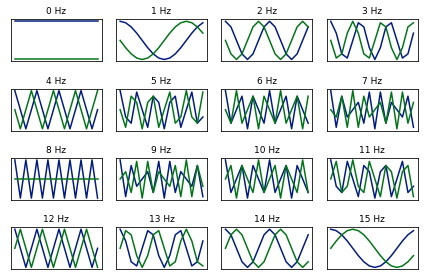

In [3]:
pnts = 16 # number of time points
fourTime = np.array(range(0,pnts))/pnts

for fi in range(0,pnts):
    # create complex sine wave
    csw = np.exp( -1j * 2*np.pi * fi * fourTime )

    # and plot it
    loc = np.unravel_index(fi,[4, 4],'F')
    fig = plt.subplot2grid((4,4),(loc[1],loc[0]))
    plt.plot(fourTime,np.real(csw))
    plt.plot(fourTime,np.imag(csw))
    plt.title(f'{fi} Hz',fontsize=9)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    
plt.tight_layout()
plt.show()

In [4]:
power = 1/4*(2/(4*np.pi**2)+(1/8-(3*math.sqrt(2))/(4*np.pi))**2+1/16+(3/8-(math.sqrt(2))/(4*np.pi))**2)
print(power)

power = (1/4) * (0.05+0.0452+1/4+0.068)

0.056813190523658436


# Scaling Fourier coefficients

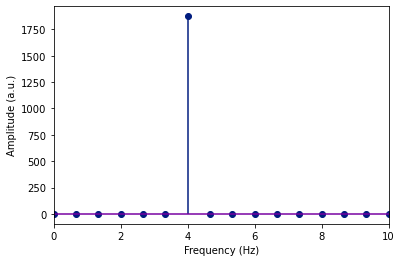

srate: 1000
time(1500,): (0.0, 1.499)
pnts: 1500
fourTime(1500,): (0.0, 1.0)
hz(751,): (0.0, 500.0)


In [19]:
## incorrect amplitude units without normalizations

# create the signal
srate  = 1000 # hz
time   = np.arange(0.,1.5,1/srate)  # time vector in seconds
pnts   = len(time)   # number of time points
signal = 2.5 * np.sin( 2*np.pi * 4 * time )

# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    # create complex sine wave and compute dot product with signal
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )

# extract amplitudes
ampls = np.abs(fCoefs);

# compute frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

plt.stem(hz,ampls[range(0,len(hz))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,10)
plt.show()

print(f"srate: {srate}")
print(f"time{time.shape}: {time[0], time[-1]}")
print(f"pnts: {pnts}")
print(f"fourTime{fourTime.shape}: {fourTime[0], np.round(fourTime[-1])}")
print(f"hz{hz.shape}: {hz[0], np.round(hz[-1])}")

# Phase

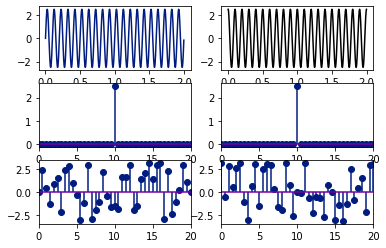

In [6]:
## same amplitudes, different phases

# simulation parameters
srate = 1000
time  = np.arange(0.,2.,1/srate)
npnts = len(time)

# generate signal
signal1 = 2.5*np.sin(2*np.pi*10*time +   0  ) # different phase values
signal2 = 2.5*np.sin(2*np.pi*10*time + np.pi/2 )


# prepare the Fourier transform
fourTime = np.array(range(0,npnts)) / npnts
signal1X = np.zeros((len(signal1)),dtype=complex)
signal2X = np.zeros((len(signal2)),dtype=complex)

for fi in range(0,npnts):
    
    # create complex sine wave
    csw = np.exp( -1j * 2*np.pi * fi * fourTime )
    
    # compute dot product between sine wave and signal
    # these are called the Fourier coefficients
    signal1X[fi] = np.sum( np.multiply(signal1,csw) ) / npnts
    signal2X[fi] = np.sum( np.multiply(signal2,csw) ) / npnts


# frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(npnts/2.)+1)

# extract correctly-normalized amplitude
signal1Amp = np.abs(signal1X[range(0,len(hz))])
signal1Amp[1:] = 2*signal1Amp[1:]

signal2Amp = np.abs(signal2X[range(0,len(hz))])
signal2Amp[1:] = 2*signal2Amp[1:]


# now extract phases
signal1phase = np.angle(signal1X[0:len(hz)])
signal2phase = np.angle(signal2X[0:len(hz)])


# plot time-domain signals
plt.subplot2grid((3,2),(0,0))
plt.plot(time,signal1)

plt.subplot2grid((3,2),(0,1))
plt.plot(time,signal2,'k')

plt.subplot2grid((3,2),(1,0))
plt.stem(hz,signal1Amp)
plt.xlim([0,20])

plt.subplot2grid((3,2),(1,1))
plt.stem(hz,signal2Amp)
plt.xlim([0,20])

plt.subplot2grid((3,2),(2,0))
plt.stem(hz,signal1phase)
plt.xlim([0,20])

plt.subplot2grid((3,2),(2,1))
plt.stem(hz,signal2phase)
plt.xlim([0,20])

plt.show()

# Averaging Fourier coefficients

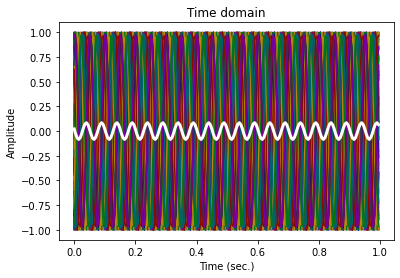

In [7]:
# simulation parameters
ntrials = 100
srate   = 200 # Hz
time    = np.arange(0,1,1/srate)
pnts    = len(time)


# create dataset
data = np.zeros((ntrials,pnts))
for triali in range(0,ntrials):
    data[triali,:] = np.sin(2*np.pi*20*time + 2*np.pi*np.random.rand())

# plot the data
for i in range(0,ntrials):
    plt.plot(time,data[i,:])
plt.plot(time,np.mean(data,axis=0),'w',linewidth=3)
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Time domain')
# plt.xlim([0,.1])

plt.show()

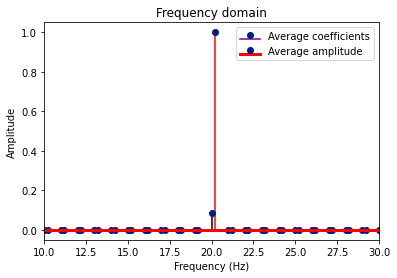

In [8]:
# get Fourier coefficients
dataX = scipy.fftpack.fft(data,axis=1) / pnts
hz = np.linspace(0,srate/2,num=math.floor(pnts/2)+1)

# averaging option 1: complex Fourier coefficients, then magnitude
ave1 = 2*np.abs( np.mean(dataX,axis=0) )

# averaging option 2: magnitude, then complex Fourier coefficients
ave2 = np.mean( 2*np.abs(dataX),axis=0 )

# plot both amplitude spectra
markerline, stemlines, baseline = plt.stem(hz,ave1[0:len(hz)],'ks-',label='Average coefficients')
markerline, stemlines, baseline = plt.stem(hz+.2,ave2[0:len(hz)],'ro-',label='Average amplitude')
plt.setp(baseline, color='r', linewidth=3)
plt.xlim([10,30])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain')
plt.legend()
plt.show()

<ipython-input-9-4668c5800179>:18: UserWarning: signal preferred to be even in size, autoFixing it...
  warnings.warn("signal preferred to be even in size, autoFixing it...")


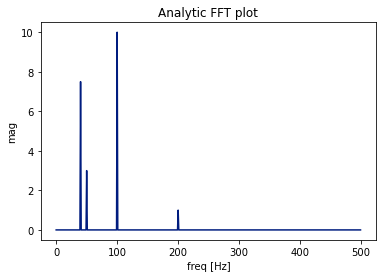

<ipython-input-9-4668c5800179>:18: UserWarning: signal preferred to be even in size, autoFixing it...
  warnings.warn("signal preferred to be even in size, autoFixing it...")


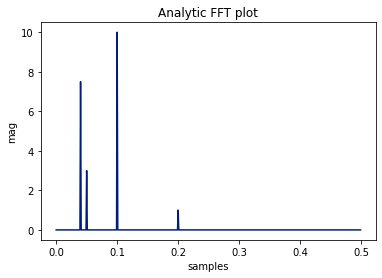

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import warnings


def fftPlot(sig, dt=None, plot=True):
    # Here it's assumes analytic signal (real signal...) - so only half of the axis is required

    if dt is None:
        dt = 1
        t = np.arange(0, sig.shape[-1])
        xLabel = 'samples'
    else:
        t = np.arange(0, sig.shape[-1]) * dt
        xLabel = 'freq [Hz]'

    if sig.shape[0] % 2 != 0:
        warnings.warn("signal preferred to be even in size, autoFixing it...")
        t = t[0:-1]
        sig = sig[0:-1]

    sigFFT = np.fft.fft(sig) / t.shape[0]  # Divided by size t for coherent magnitude

    freq = np.fft.fftfreq(t.shape[0], d=dt)

    # Plot analytic signal - right half of frequence axis needed only...
    firstNegInd = np.argmax(freq < 0)
    freqAxisPos = freq[0:firstNegInd]
    sigFFTPos = 2 * sigFFT[0:firstNegInd]  # *2 because of magnitude of analytic signal

    if plot:
        plt.figure()
        plt.plot(freqAxisPos, np.abs(sigFFTPos))
        plt.xlabel(xLabel)
        plt.ylabel('mag')
        plt.title('Analytic FFT plot')
        plt.show()

    return sigFFTPos, freqAxisPos


if __name__ == "__main__":
    dt = 1 / 1000

    # Build a signal within Nyquist - the result will be the positive FFT with actual magnitude
    f0 = 200  # [Hz]
    t = np.arange(0, 1 + dt, dt)
    sig = 1 * np.sin(2 * np.pi * f0 * t) + \
        10 * np.sin(2 * np.pi * f0 / 2 * t) + \
        3 * np.sin(2 * np.pi * f0 / 4 * t) +\
        7.5 * np.sin(2 * np.pi * f0 / 5 * t)

    # Result in frequencies
    fftPlot(sig, dt=dt)
    # Result in samples (if the frequencies axis is unknown)
    fftPlot(sig)

#  The DC coefficient

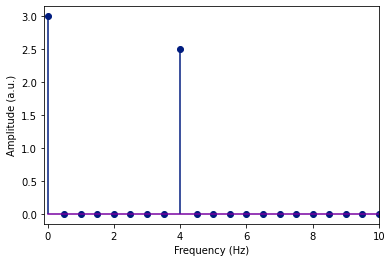

In [25]:
## incorrect DC reconstruction without careful normalization

# create the signal
srate  = 1000 # hz
time   = np.arange(0.,2.,1/srate) # time vector in seconds
pnts   = len(time) # number of time points
signal =  1.5 + 2.5*np.sin( 2*np.pi * 4 * time )


# prepare Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    # create complex sine wave and compute dot product with signal
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )


# extract amplitudes
ampls = 2*np.abs(fCoefs/pnts);

# compute frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

plt.stem(hz,ampls[0:len(hz)])
plt.xlim(-.1,10)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.show()

# Amplitude spectrum vs. power spectrum

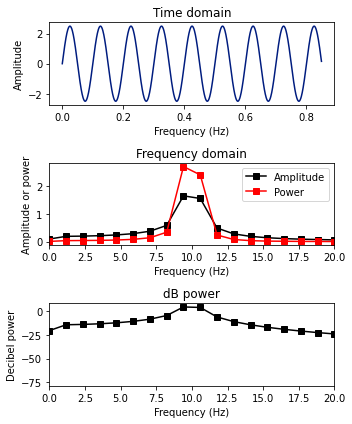

srate: 1000
time(850,): (0.0, 0.849)
pnts: 2000
fourTime(2000,): (0.0, 1.0)
hz(426,): (0.0, 500.0)


In [45]:
# simulation parameters
srate = 1000
time  = np.arange(0,.85,1/srate)
npnts = len(time)

# generate signal
signal = 2.5*np.sin(2*np.pi*10*time)

# Fourier transform and frequencies
signalX = scipy.fftpack.fft(signal) / npnts
hz = np.linspace(0,srate/2,math.floor(len(time)/2)+1)


# extract correctly-normalized amplitude
signalAmp = np.abs(signalX[0:len(hz)])
signalAmp[1:] = 2*signalAmp[1:] # ** here **

# and power
signalPow = signalAmp**2

fig, ax = plt.subplots(3,1,figsize=(5,6))

# plot time-domain signal
ax[0].plot(time,signal)
ax[0].set(xlabel='Frequency (Hz)', ylabel='Amplitude')
ax[0].set_title('Time domain')

# plot frequency domain spectra
ax[1].plot(hz,signalAmp,'ks-',label='Amplitude')
ax[1].plot(hz,signalPow,'rs-',label='Power')
ax[1].set(xlim=[0,20], xlabel='Frequency (Hz)', ylabel='Amplitude or power', title='Frequency domain')
ax[1].legend()

# plot dB power
ax[2].plot(hz,10*np.log10(signalPow),'ks-')
ax[2].set(xlim=[0,20], xlabel='Frequency (Hz)', ylabel='Decibel power', title='dB power')

plt.tight_layout()
plt.show()

print(f"srate: {srate}")
print(f"time{time.shape}: {time[0], time[-1]}")
print(f"pnts: {pnts}")
print(f"fourTime{fourTime.shape}: {fourTime[0], np.round(fourTime[-1])}")
print(f"hz{hz.shape}: {hz[0], np.round(hz[-1])}")